In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter as dfmt
from datetime import datetime
import struct 

In [2]:
f = open('TaurusScanMarch10.bin','rb')
s=f.read()
f.close()
numFloats=len(s)/4 
bins=256
floatsPerRow = bins
numRows=numFloats/floatsPerRow

rows = []
for j in range(int(numRows)):
    rows.append(struct.unpack(("%if" % floatsPerRow),
    			s[j*floatsPerRow*4:(j+1)*floatsPerRow*4]))

data = np.array(rows)
len(data)


4188

In [3]:
Energies = []
def METDATA(x,y,z):
    def getMeta():
        f=open(x + '.met','r')
        mets=f.readlines()
        f.close()
        metDict = {}
        for met in mets:
            val, key = [x.strip() for x in met.split("#")]
            if 'UTC' in val:
                metDict[key] = datetime.strptime(val, "%Y-%m-%d %H:%M:%S %Z")
            elif '.' in val:
                metDict[key] = float(val)
            else:
                metDict[key] = int(val)

        return metDict

    def getRadioData(file):

        f = open(file + '.bin','rb')
        s=f.read()
        f.close()
        numFloats=len(s)/4 
        bins=256
        floatsPerRow = bins
        numRows=numFloats/floatsPerRow

        rows = []
        for j in range(int(numRows)):
            rows.append(struct.unpack(("%if" % floatsPerRow),
                        s[j*floatsPerRow*4:(j+1)*floatsPerRow*4]))

        return np.array(rows)

    def buildDataFrame(file='', metDict=None, radioData=None):
        if metDict is None:
            if not file:
                raise RuntimeError("Ack. Without metadata, I need a file!")
            else:
                metDict = getMeta()
        if radioData is None:
            if not file:
                raise RuntimeError("Ack. Without radio data, I need a file!")
            else:
                radioData = getRadioData(file)

        startTime= metDict['firstAcqTimestamp UTC'].timestamp()
        endTime= metDict['lastAcqTimestamp UTC'].timestamp()
        times= np.linspace(startTime, endTime, len(radioData))
        tstamps= np.array([datetime.fromtimestamp(x) 
                  for x in times])
        tseries= pd.Series(tstamps)
        return pd.DataFrame({'time':tseries, 'energy':radioData.mean(axis=1)})
    df = buildDataFrame(x)
    #df.plot('time','energy',figsize=(14,10))
    #plt.ylabel('Radio Energy (dB)')
    #plt.grid()
    begin = y
    end = z

    fig = plt.figure(figsize=(14,10))
    ax = plt.gca()

    form_date = dfmt('%m/%d %H:%M')
    ax.xaxis.set_major_formatter(form_date)

    plt.xlabel('time (m-d h, UTC)')
    plt.ylabel('Relative Energy (dB)')
    plt.title('A recent glimps of Taurus A')
    plt.grid()
    plt.plot(df.time[begin:end], df.energy[begin:end],'b.')

    Energies.append([df.energy[begin:end]])
    #dt= np.append(dt,[df.energy[begin:end]])
    begin = 0
    end = 4193
    fig = plt.figure(figsize=(14,10))
    ax = plt.gca()

    form_date = dfmt('%m/%d %H:%M')
    ax.xaxis.set_major_formatter(form_date)

    plt.xlabel('time (m-d h, UTC)')
    plt.ylabel('Relative Energy (dB)')
    plt.title('A recent glimps of Taurus A')
    plt.grid()
    plt.plot(df.time[begin:], df.energy[begin:],'b.')

In [4]:
Energies = np.array(Energies)
dt = np.linspace(0,100,num = len(Energies[0][0]))
from scipy.optimize import curve_fit
from scipy.misc import derivative
from math import *

def objective(x,x0,w,S,m,b):
        return  m*(x-x0) + b + S*np.exp(-((x-x0)/w)**2)
def curve_fitting(xvals,yvals,w_0):
    x0_0=22
    S_0= -38.37
    m_0= -0.015
    b_0=-39.25 
    popt, pcov = curve_fit(objective, xvals, yvals, p0=(x0_0, w_0, S_0, m_0, b_0))
    x0 = popt[0]
    w = popt[1]
    S = popt[2]
    m = popt[3]
    b = popt[4]
    plt.plot(xvals,yvals,'b*')
    plt.plot(xvals,objective(xvals, x0,w,S,m,b),'r-')
    print(popt)
    plt.grid()
    plt.grid(color='k',linestyle =':',linewidth='0.5')
    print(x0)
y = (Energies[0][0])
curve_fitting(dt,y,30)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
METDATA('TaurusScanMarch14',710,884)

NameError: name 'x0' is not defined

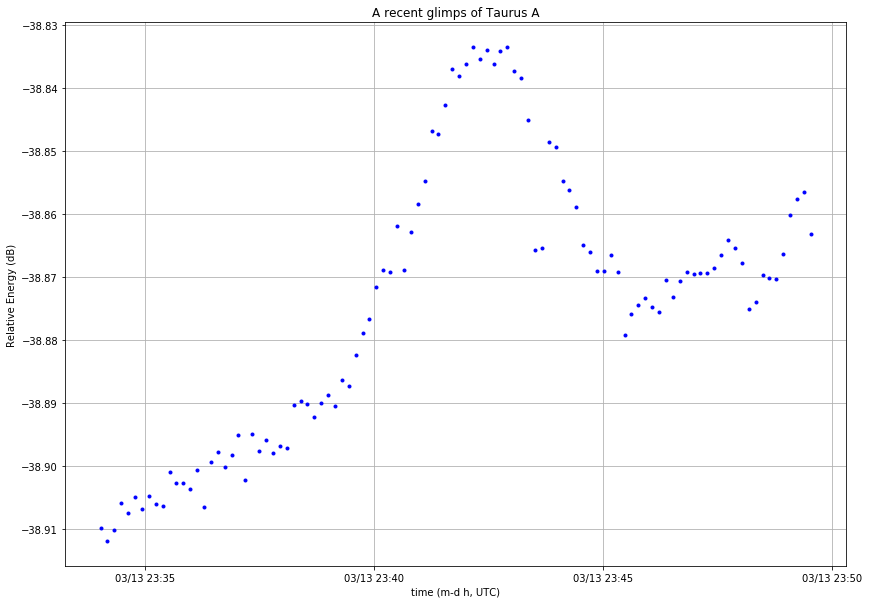

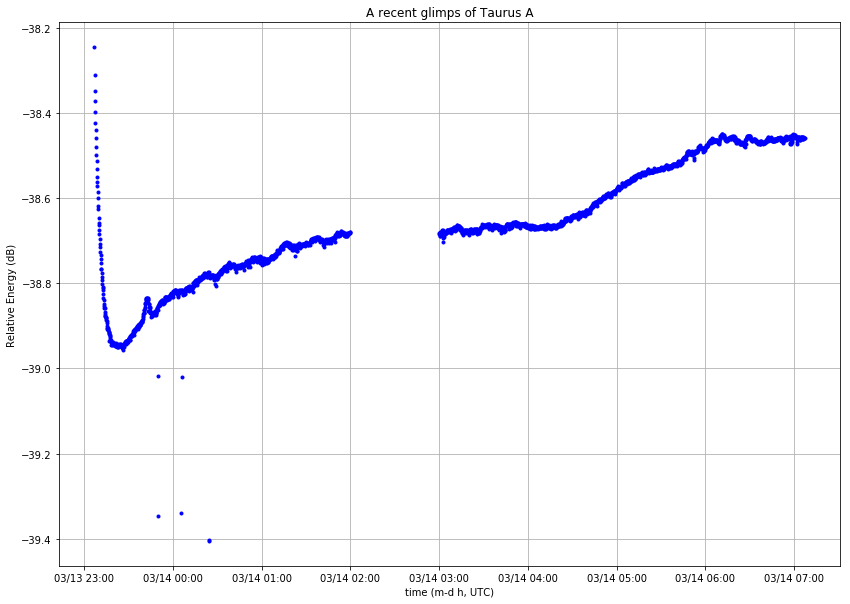

In [40]:
Energies = []
METDATA('TaurusScanMarch13',180,284)

[ 5.33910743e+01  1.28559193e+01  4.93585667e-02  4.50038819e-04
 -3.88844363e+01]


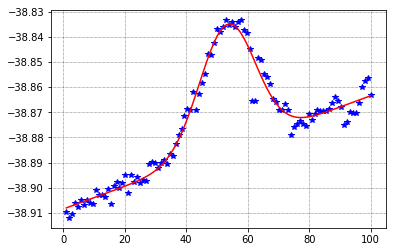

In [41]:
Energies = np.array(Energies)
dt = np.linspace(1,100,num = len(Energies[0][0]))
y = (Energies[0][0])
curve_fitting(dt,y,30)

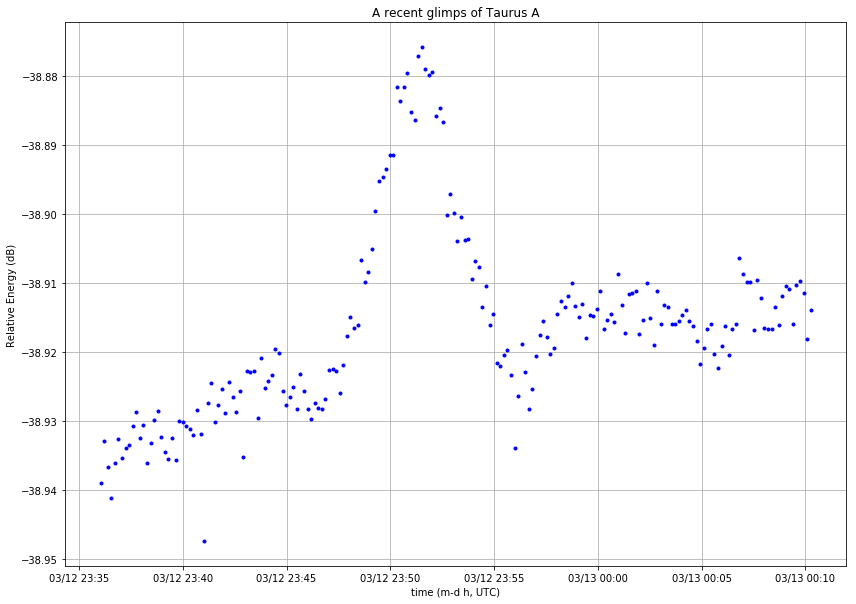

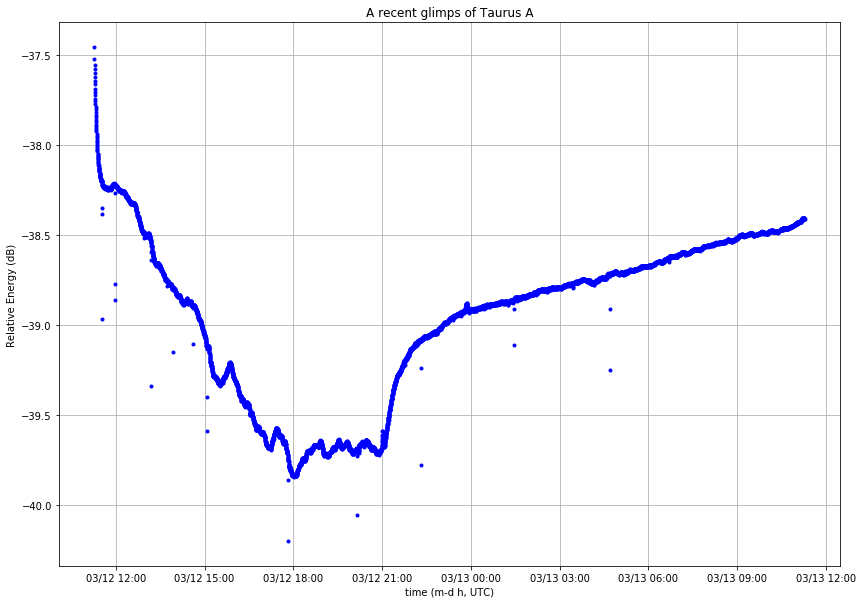

In [42]:
Energies = []
METDATA('TaurusScanMarch12',4300,4500)

[ 4.49400302e+01  6.94046889e+00  4.42952479e-02  2.22207164e-04
 -3.89232207e+01]


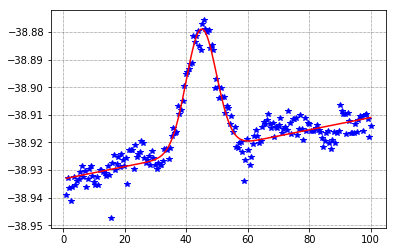

In [43]:
Energies = np.array(Energies)
dt = np.linspace(1,100,num = len(Energies[0][0]))
y = (Energies[0][0])
curve_fitting(dt,y,30)

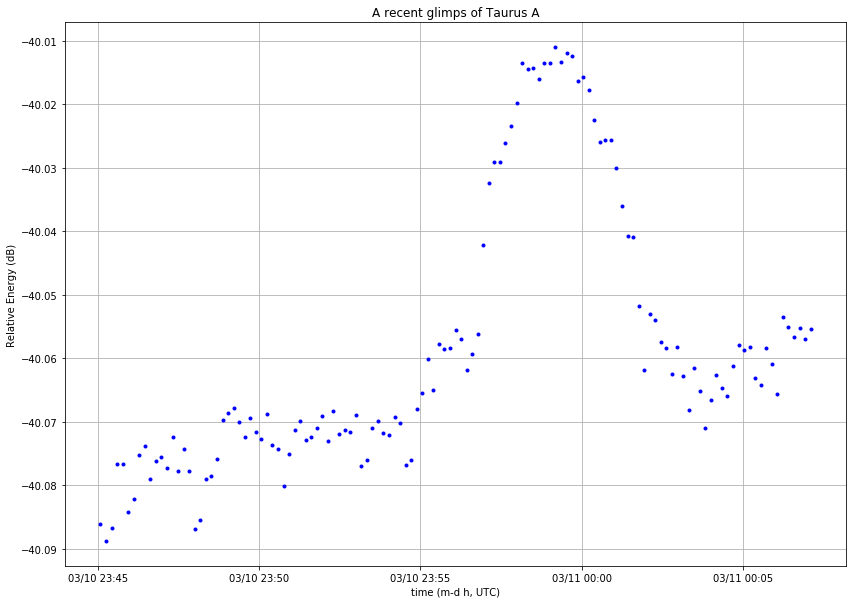

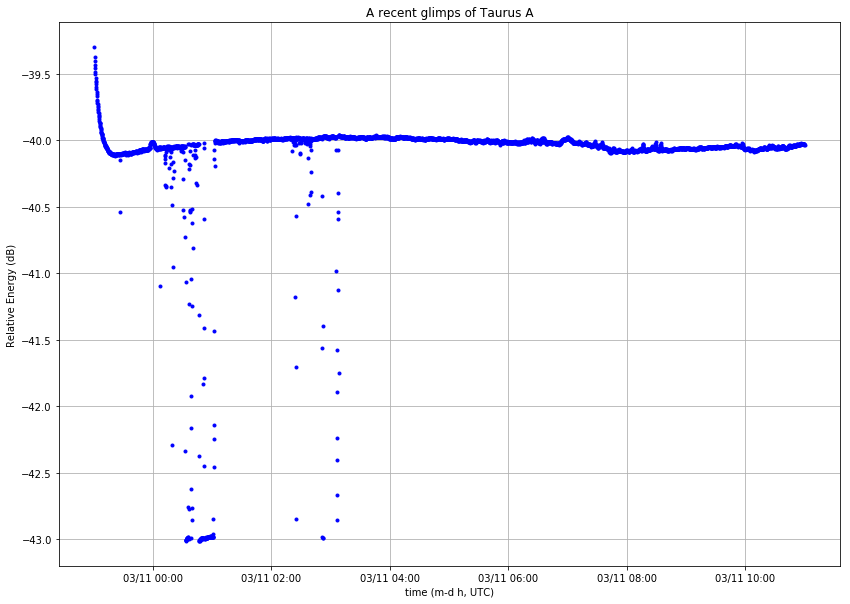

In [44]:
Energies = []
METDATA('TaurusScanMarch11',260,389)

[ 6.40470592e+01  1.06782429e+01  5.75664644e-02  1.98654610e-04
 -4.00667195e+01]


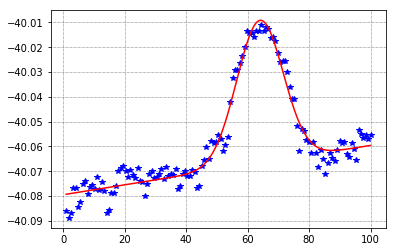

In [45]:
Energies = np.array(Energies)
dt = np.linspace(1,100,num = len(Energies[0][0]))
y = (Energies[0][0])

curve_fitting(dt,y,40)

In [93]:
from scipy import interpolate
out = []
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(Energies[0][0])):
        #print(len(tck))
        out[n] = interpolate.splint(0, x[n], interpolate.splint(x,tck,0))
    out += constant
    return out
xnew = 0
yint = integ(dt, y)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

TypeError: cannot unpack non-iterable int object

In [49]:
from matplotlib import pyplot as plt
import seaborn as sea

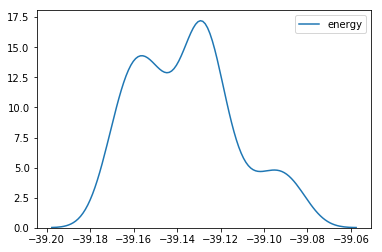

In [65]:
sea.kdeplot(Energies[0][0])